In [1]:
%load_ext autoreload
%autoreload 2

In [53]:
import sys
from pathlib import Path

import pdblp
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

if (path := 'C:\\dev\\projects\\credit\\backend') not in sys.path:
    sys.path.append(path)

from api.blp import BlpQuery
import utils

In [3]:
root_path = Path('/dev/projects/credit/backend/')
data_path = root_path / 'data'

### Bloomberg Connection

In [4]:
name_mapping = {
    'INDEX_Z_SPREAD': 'z_spread',
    'CONTRBTD_ZSPREAD': 'z_spread'
}

In [5]:
dt_fmt = '%Y%m%d'
bq = BlpQuery(timeout=20000).start()

In [6]:
indices_ref = pd.read_csv(data_path / 'indices_reference.csv')
indices_hist = pd.read_csv(data_path / 'indices_history.csv') 

In [39]:
indices_hist['date'] = pd.to_datetime(indices_hist['date'], format='%d/%m/%Y')

In [70]:
fin_sen = 'I08154EU Index'
fin_sen = 'I08153EU Index'
non_fin_sen = 'I02008EU Index'

In [71]:
fin_spread = indices_hist[indices_hist['security'] == fin_sen].set_index('date').drop('security', axis=1).squeeze().rename(fin_sen)
non_fin_spread = indices_hist[indices_hist['security'] == non_fin_sen].set_index('date').drop('security', axis=1).squeeze().rename(non_fin_sen)

In [72]:
lm = LinearRegression()

In [73]:
start_date = '2017-05-01'

In [74]:
X = non_fin_spread.to_frame()[start_date:]
y = fin_spread[start_date:]

In [75]:
lm.fit(X, y)

LinearRegression()

In [76]:
res = y - lm.predict(X)

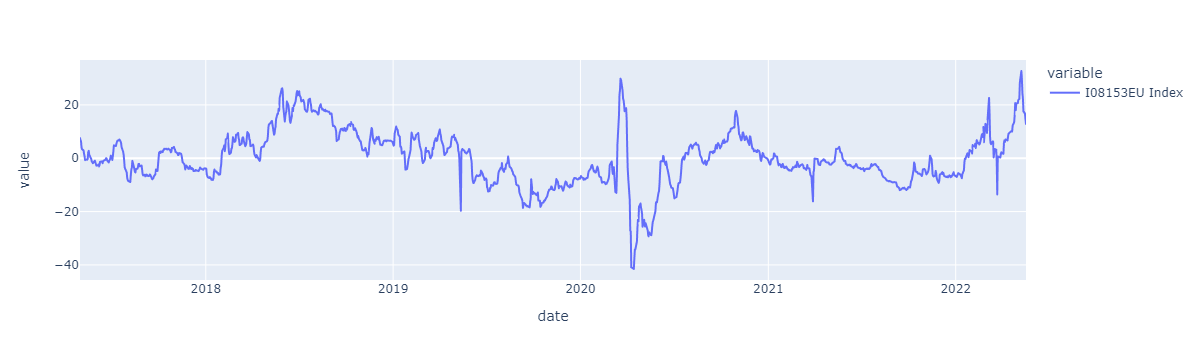

In [77]:
(res * 100).plot(backend='plotly')

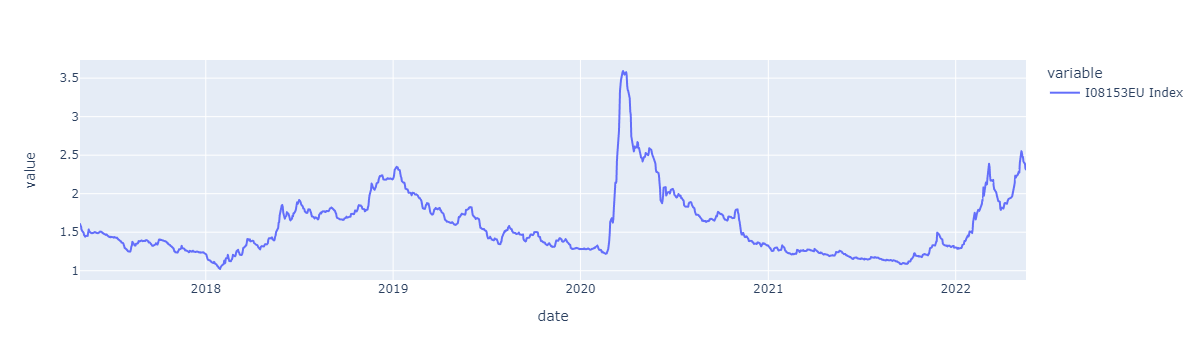

In [83]:
y.plot(backend='plotly')

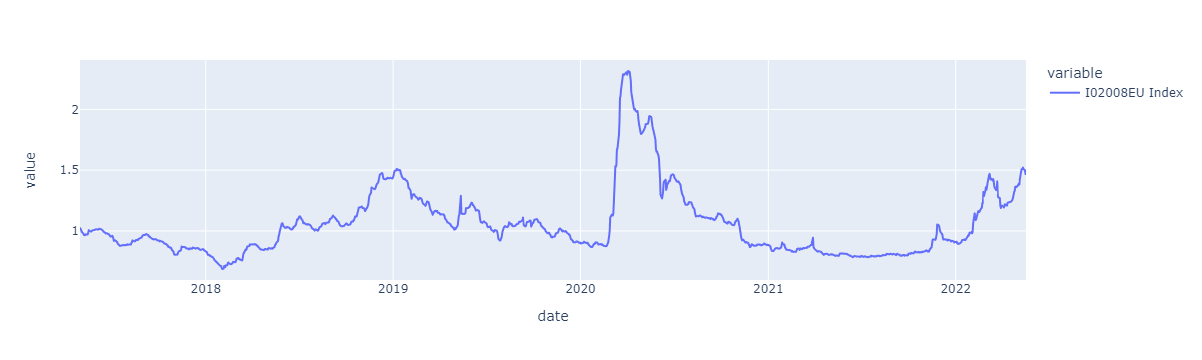

In [84]:
X.squeeze().plot(backend='plotly')